In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

In [2]:
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df = match_rep_df[match_rep_df["sphering"] == True]
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
6,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
8,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.174914,57.777778,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",23.255814,0.244983,544244
354,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.157136,60.000000,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.227059,543826
356,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.179268,58.888889,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.253483,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567


In [3]:
# Find the names of plates that contain at least 3 sites
three_plus =  match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sites"] >= 3)
    ]["Assay_Plate_Barcode"].values

# Subset df so that it only contains profiles (and their sitesubsampled profiles) that have at least 3 sites
three_plus_df = match_rep_df[match_rep_df["Assay_Plate_Barcode"].isin(three_plus)]

three_plus_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
6,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
8,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.174914,57.777778,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",23.255814,0.244983,544244
354,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.157136,60.000000,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.227059,543826
356,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.179268,58.888889,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.253483,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567


In [4]:
# Use unique since siteSubSampled data has the same plate name as the parent
plates = three_plus_df["Assay_Plate_Barcode"].unique()

out_df = pd.DataFrame()

# For each group of plates, find linear regression between the cell count and percent replicating value
for plate in plates:
    x = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["cell_count"]
    y_replicating = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["Percent_Replicating"]
    y_matching = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["Percent_Matching"]

    slope_replicating, intercept_replicating, rvalue_replicating, pvalue_replicating, _ = scipy.stats.linregress(x, y_replicating)

    slope_matching, intercept_matching, rvalue_matching, pvalue_matching, _ = scipy.stats.linregress(x, y_matching)

    out_df = pd.concat([out_df, pd.DataFrame.from_dict({
        "Assay_Plate_Barcode": [plate],
        "slope_replicating":[slope_replicating],
        "rvalue_replicating": [rvalue_replicating],
        "pvalue_replicating": [pvalue_replicating],
        "slope_matching":[slope_matching],
        "rvalue_matching": [rvalue_matching],
        "pvalue_matching": [pvalue_matching]
        })])

out_df

,Assay_Plate_Barcode,slope_replicating,rvalue_replicating,pvalue_replicating,slope_matching,rvalue_matching,pvalue_matching
0,Plate2_PCO_6ch_4site_10XPA,8.425659e-06,0.801660,0.198340,6.300241e-06,0.819939,0.180061
0,Plate3_PCO_6ch_4site_10XPA_Crest,2.197713e-06,0.942337,0.057663,0.000000e+00,0.000000,1.000000
0,Plate3_PCO_6ch_4site_10XPA_Crestz,1.429231e-06,0.415595,0.584405,7.607881e-07,0.308154,0.691846
0,Plate3_PCO_6ch_4site_20XPA_Crestz,7.388579e-06,0.761462,0.238538,3.755633e-06,0.339729,0.660271
0,Plate2_PCO_6ch_9site_20XPA,1.420147e-05,0.906654,0.033752,7.590006e-06,0.540092,0.347407
0,Plate3_PCO_6ch_9site_20XPA_Crest,3.673690e-06,0.486307,0.406169,1.084390e-06,0.369333,0.540671
0,BR00117061a,5.709806e-06,0.957926,0.010294,3.239172e-06,0.919187,0.027241
0,BR00117062a,4.522992e-06,0.963563,0.008303,-5.219567e-07,-0.156633,0.801388
0,BR00117063b,1.817600e-06,0.591245,0.293712,2.220844e-06,0.573901,0.311659
0,CP_Broad_Phenix_C_BIN1_1Plane_P1,3.193599e-05,0.961683,0.176803,1.887438e-05,0.847915,0.355715


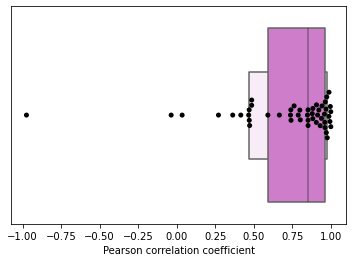

In [26]:
fig = sns.boxenplot(x=out_df["rvalue_replicating"], showfliers=False, color="orchid")
fig = sns.swarmplot(x=out_df["rvalue_replicating"], color="black")
fig.set_title("")
fig.set(xlabel="Pearson correlation coefficient", ylabel="")
fig.tick_params(left=False)
fig.set_facecolor("white")
fig.get_figure().savefig("(S3A)-percent_replicating-cell_count_linregress-r_value.png", dpi=300)

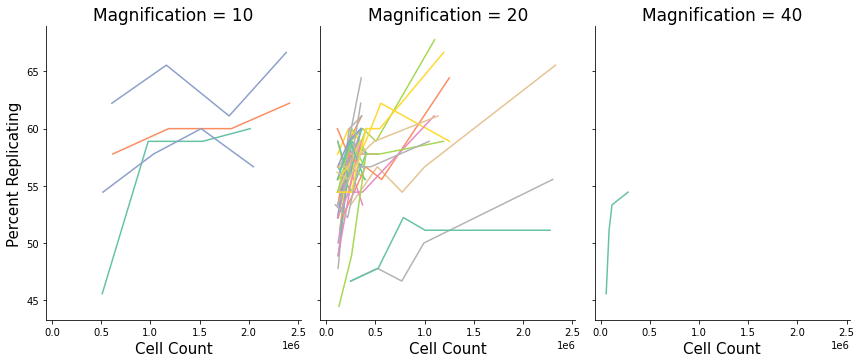

In [28]:
fig = sns.relplot(data=three_plus_df, x="cell_count", y="Percent_Replicating", hue="Assay_Plate_Barcode", legend=False, col="Magnification", kind="line", palette="Set2", aspect=.8)
fig.set(xlabel="Cell Count", ylabel="Percent Replicating")
for ax in fig.axes.flatten():
    ax.title.set_size(17)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
fig.savefig("(S3B)-percent_replicating-vs-cell_count-magnifcation_facet.png", dpi=300)